# Assignment 1 (CSC3160/AIR6063)

This is an instruction and template for the first assignment. In this assignment, you will learn how to use tools to extract speech representations.

Should you have any inquiries, please feel free to reach out to the teaching team.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

torch.float32
Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


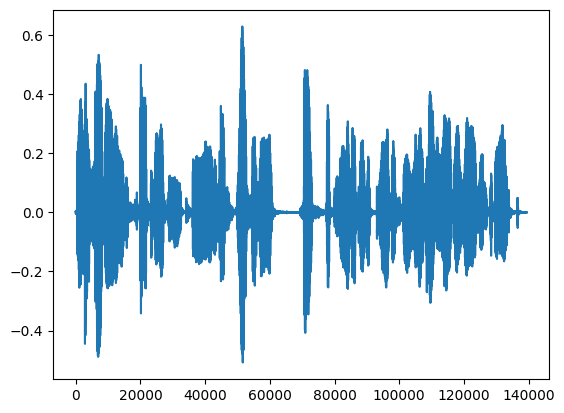

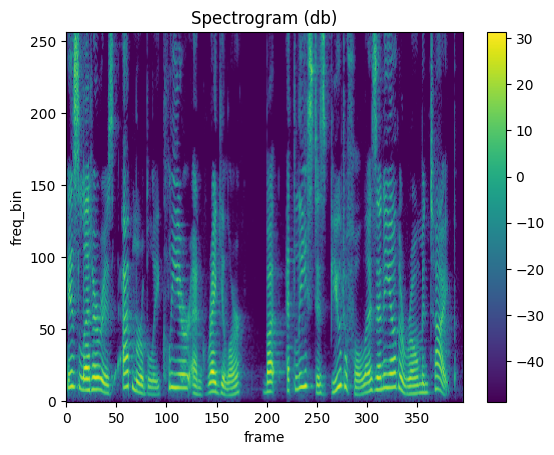

In [ ]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)
print(resampled_waveform.dtype)
# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [20 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024)
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



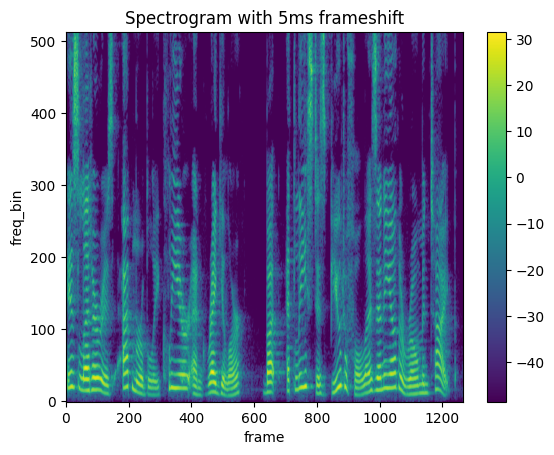

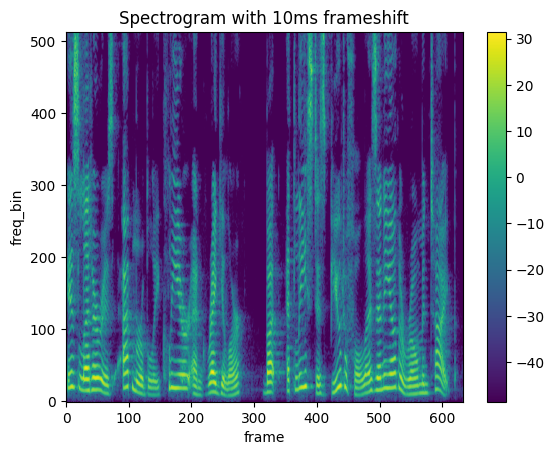

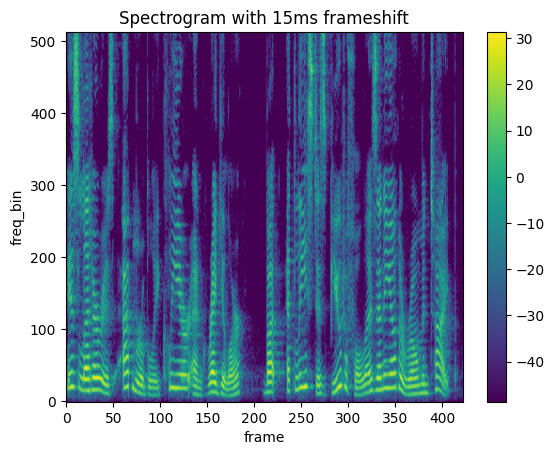

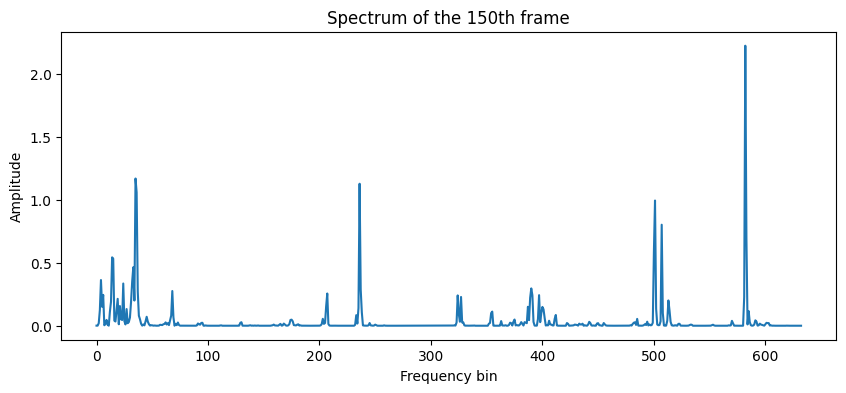

In [ ]:
# Write your implementation here
import IPython.display as ipd

# display the provided speech sample
ipd.display(ipd.Audio(resampled_waveform, rate=target_sample_rate))

# use waveform1 to indicate the provided speech sample for use in following questions
waveform1=resampled_waveform

##Q1
# in the example, the resampled_waveform has been converted to 16 kHz sampling rate
# consider FFT, hop length(frameshift), and window size
n_fft = 1024
win_length = int(0.030 * target_sample_rate)  # 30ms window size

## frameshift: 5ms
spec_trans1 = T.Spectrogram(n_fft=1024,win_length=win_length,hop_length=int(0.005 * target_sample_rate),power=2)
spec1 = spec_trans1(resampled_waveform)
plot_spectrogram(spec1[0],title='Spectrogram with 5ms frameshift')

## frameshift: 10ms
spec_trans2 = T.Spectrogram(n_fft=1024,win_length=win_length,hop_length=int(0.010 * target_sample_rate), power=2)
spec2 = spec_trans2(resampled_waveform)
plot_spectrogram(spec2[0],title='Spectrogram with 10ms frameshift')

## frameshift: 15ms
spec_trans3 = T.Spectrogram(n_fft=1024,win_length=win_length,hop_length=int(0.015 * target_sample_rate), power=2)
spec3 = spec_trans3(resampled_waveform)
plot_spectrogram(spec3[0],title='Spectrogram with 15ms frameshift')

##Q2
def plot_spectrum(frame, title=None, ylabel="Amplitude", xlabel="Frequency bin"):
    plt.figure(figsize=(10, 4))
    plt.plot(frame)
    plt.title(title or "Spectrum")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

spec_trans4 = T.Spectrogram(n_fft=512,win_length=win_length, hop_length=int(0.010 * target_sample_rate)) # 512-dimensional spectrogram with 10 ms frameshift
spec4= spec_trans4(resampled_waveform)

spec_150th_frame = spec4[:, 149, :] # 150th frame
plot_spectrum(spec_150th_frame[0],title='Spectrum of the 150th frame')

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [ ]:
# Write your implementation here
import torch

raw_url = f'https://raw.githubusercontent.com/Jinglan-Yang/CSC3160Assign1AudioRecord/main/CSC3160Assignment1Record.m4a'
# request the url
r = requests.get(raw_url)

# filename, where to save the audio
filename = "CSC3160Assignment1Record.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, origin_sample_rate = torchaudio.load(filename)
print("original sample rate:", origin_sample_rate,'dtype of the original waveform:',waveform.dtype)
ipd.display(ipd.Audio(waveform, rate=origin_sample_rate))


## resample your recording to 16 kHz and 16-bit depth
target_sample_rate = 16000
resampler = T.Resample(origin_sample_rate, target_sample_rate)
resampled_waveform = resampler(waveform) # convert to 16 kHz
waveform2=resampled_waveform # use waveform2 to indicate my recoding for use in the following questions
resampled_waveform = resampled_waveform.to(torch.float16) # convert to 16-bit depth

print("target sample rate:", target_sample_rate,'dtype of the target waveform:',resampled_waveform.dtype)
ipd.display(ipd.Audio(resampled_waveform, rate=target_sample_rate))



original sample rate: 16000 dtype of the original waveform: torch.float32


target sample rate: 16000 dtype of the target waveform: torch.float16


## (3) [20 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html).

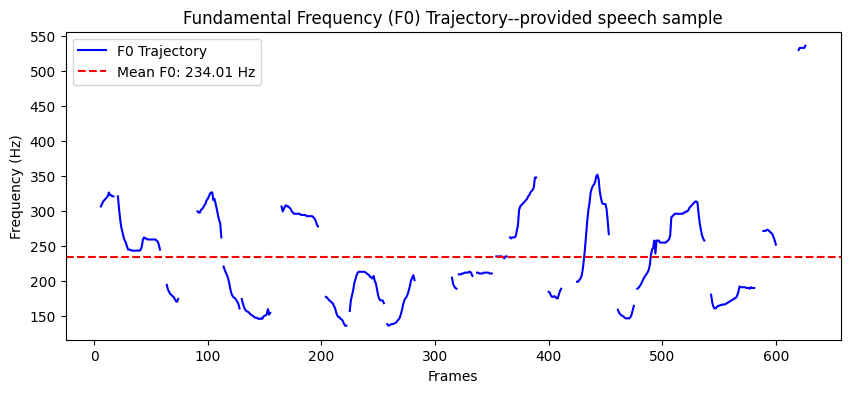

F0 mean of the provided speech sample:  234.01106534039255


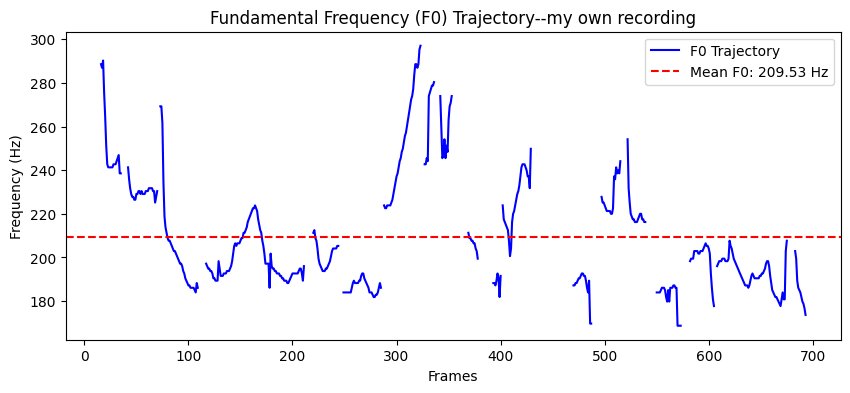

F0 mean of my own recording:  209.53408273946658


In [ ]:
# Write your implementation here
import numpy as np

##Q1
f0, _, _ = librosa.pyin(waveform1.squeeze().numpy(), fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)
mean_f0 = np.nanmean(f0)
plt.figure(figsize=(10, 4))

plt.plot(f0, label='F0 Trajectory', color='blue')
plt.axhline(mean_f0, color='red', linestyle='--', label=f'Mean F0: {mean_f0:.2f} Hz')
plt.title("Fundamental Frequency (F0) Trajectory--provided speech sample")
plt.xlabel("Frames")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()

print("F0 mean of the provided speech sample: ",mean_f0)


##Q2
f0, _, _ = librosa.pyin(waveform2.squeeze().numpy(), fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)
mean_f0 = np.nanmean(f0)
plt.figure(figsize=(10, 4))

plt.plot(f0, label='F0 Trajectory', color='blue')
plt.axhline(mean_f0, color='red', linestyle='--', label=f'Mean F0: {mean_f0:.2f} Hz')
plt.title("Fundamental Frequency (F0) Trajectory--my own recording")
plt.xlabel("Frames")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()

print("F0 mean of my own recording: ",mean_f0)

## (4) [30 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using the power spectrogram.

Here are your tasks:
* Visualize the aligned power spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
# Write your implementation here
!pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512585 sha256=ac688cce8c3d6285fd7395ff26e7f2a5705071456d93b94783ba9c1e9c4208b2
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


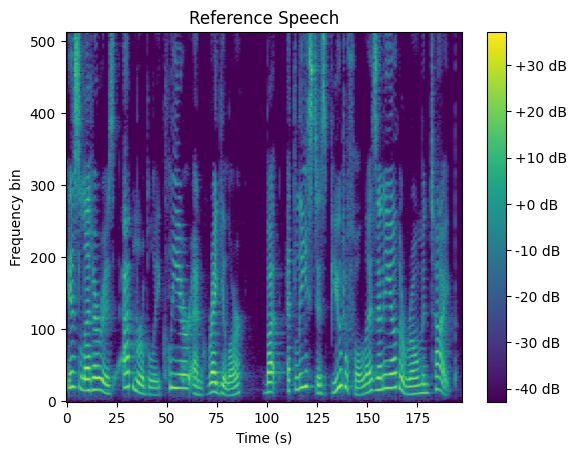

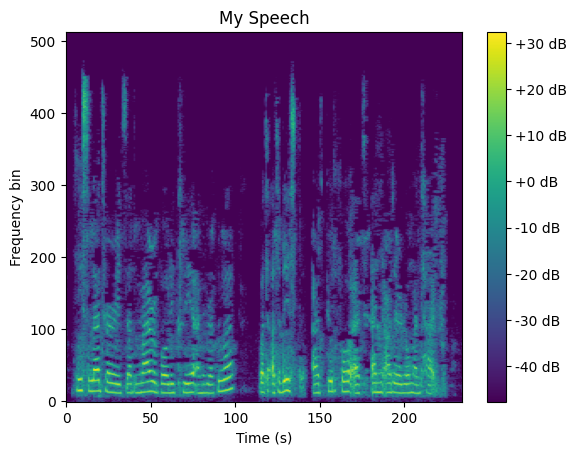

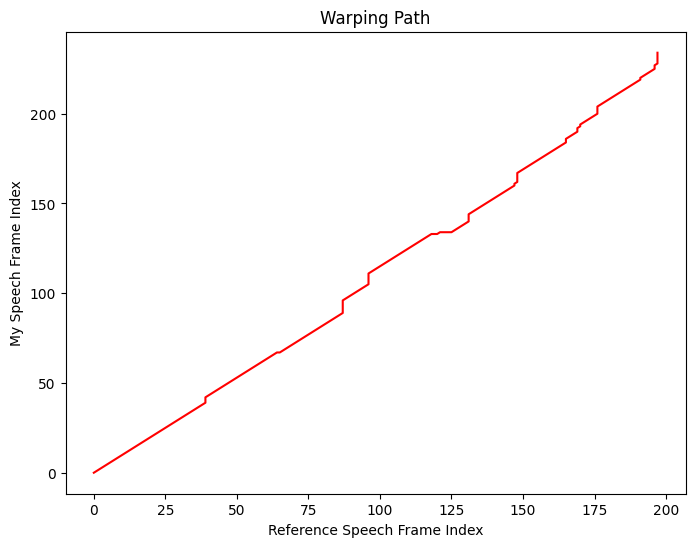

In [ ]:
import fastdtw
from scipy.spatial.distance import euclidean

def plot_spectrogram2(specgram, title=None, ylabel="Frequency bin", xlabel="Time (s)"):
    plt.imshow(specgram, origin="lower", aspect="auto")
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or "Spectrogram (dB)")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

spec_transform = T.Spectrogram(n_fft=1024, power=2)
spec_ref = spec_transform(waveform1)
ref_spectrogram_np=librosa.power_to_db(spec_ref[0].numpy())

spec_my = spec_transform(waveform2)
my_spectrogram_np=librosa.power_to_db(spec_my[0].numpy())

# Perform DTW
distance, warp_path = fastdtw.fastdtw(ref_spectrogram_np.T, my_spectrogram_np.T, dist=euclidean)
warp_path = np.array(warp_path)

## Q1
plot_spectrogram2(ref_spectrogram_np, title=f"Reference Speech")
plot_spectrogram2(my_spectrogram_np, title=f"My Speech")

## Q2
plt.figure(figsize=(8, 6))
plt.plot(warp_path[:, 0], warp_path[:, 1], color='r')
plt.title("Warping Path")
plt.xlabel("Reference Speech Frame Index")
plt.ylabel("My Speech Frame Index")
plt.show()


## (5) [20 marks] Applications

Please write 5 application usecases that the speech technology can potentially help with, and give your reasons.

For example
- Speech disorder: a speech-to-speech conversion model that can convert disordered speech to normal speech.


**Note: Maximum 500 words.**

```
# Write your summary here (200-300 words)
```



In [10]:
print("1. Assistive Communication for Non-Verbal or Poor version Individuals:\n convert text or symbols selected by the user into natural-sounding speech or in the inverse way that translate speech to text, \n enabling effective communication. ")
print("2. Pronunciation Training for language learner:\n provide immediate and precise feedback on pronunciation errors, intonation, and rhythm, which are critical aspects of Pronunciation learning. \n This will lower the cost of hiring pronounciation teachers. ")
print("3. Voice-Controlled Home Automation:\n Speech-controlled systems can enable users with mobility issues or facilitate people to control their environment \n (lights, temperature, entertainment systems) more easily, enhancing their independence and quality of life. \n For example, you do not need to open the air-conditioner with a controller, instead you just say: open the air-conditioner.")
print("4. Customer Service Automation:\n Improves efficiency in handling customer queries, provides all day service, and can handle a large volume of inquiries simultaneously, \n enhancing customer experience and service efficiency, and lowering the cost of hiring employees. ")
print("5. Real-Time Translation for Multi-language Communication:\n Breaks down language barriers in international business, travel, and diplomacy, making communication seamless and more effective.  \n Lowering the cost of hiring a translator. \n Moreover, it is possible to protect minority languages and preserve languages that are now spoken by very few people ")

1. Assistive Communication for Non-Verbal or Poor version Individuals:
 convert text or symbols selected by the user into natural-sounding speech or in the inverse way that translate speech to text, 
 enabling effective communication. 
2. Pronunciation Training for language learner:
 provide immediate and precise feedback on pronunciation errors, intonation, and rhythm, which are critical aspects of Pronunciation learning. 
 This will lower the cost of hiring pronounciation teachers. 
3. Voice-Controlled Home Automation:
 Speech-controlled systems can enable users with mobility issues or facilitate people to control their environment 
 (lights, temperature, entertainment systems) more easily, enhancing their independence and quality of life. 
 For example, you do not need to open the air-conditioner with a controller, instead you just say: open the air-conditioner.
4. Customer Service Automation:
 Improves efficiency in handling customer queries, provides all day service, and can handl